# **Unsupervised Learning on Marketing Campaign Data: PCA, t-SNE, and K-Means Clustering**

## **I. Executive summary**

**1. Data treatment, feature engineering, and modelling have been done in the milestone project.**

 - Data treatment includes data overview, variable distribution and correlation, missing data treatment, duplicate observation and uninformative column removal, data sanity check and necessary treatment.
    
 - Feature engineering means creating new features based on the existing variable, followed by necessary data treatment. The features will better represent customer behaviors.

**2. One-line description of each cluster in its best solution.**
 - K-Means has the best silhouette score of 0.347 at K = 2.

**3. The next step is develop a business report using the best model.**
 - Action items include cluster visualization, profiling, and personalized recommendation.
 - Future improvement is expected in the aspect of new variables creation, data collection, immediate data sanity exam, and fixation.

## **II. Problem overview and solution steps**

### **Problem summary**
- Marketing campaigns brings more customers who essentially grow the business. A growing business reciprocally demands more campaigns to maintain and expand the current customer base.
- However, wrong marketing campaigns could be made due to insufficient understanding about customers. The misunderstanding is normally accompanied with a wrong or lack of customer segment. Wrong marketing campaign will fail to maintain the customer base and even will lose new customers.
- Effective customer segment will solve such problem. The prerequisite is a good collection of profilic and behaviral customer data.

### **Solution design**

- Data overview
- Explorative data analysis
- Data scaling
- PCA / T-SNE
- Clustering
- Profiling
- Recommendations.

## **III. Data overview**

### **Data Dictionary**

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

### **Coding execution**

In [11]:
#Import the necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Load the marketing campaign as DataFrame.
data = pd.read_csv('marketing_campaign.csv')

In [13]:
# Show the first five observations.
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [14]:
# Show the last five observations.
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


In [15]:
# Show the dimension of data.
data.shape

(2240, 27)

In [16]:
# Show data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
# Drop uninformative columns which has no missing values.
data.drop(columns=['ID'], inplace=True)

In [18]:
# Check the number of duplicated observations.
print("There are {} duplicated observations.".format(data[data.duplicated()].shape[0]))

There are 182 duplicated observations.


**Summary:**

- The original data has 2240 observations and 27 variables (columns).
- Income has missing values; all other columns are fully filled.
- There are 182 duplicated observations.
- By definition, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response are supposed to be categorical variables. However, because of the value, it is recorded as int64.

## **IV. Data Processing**

#### **Numerical variable overview**

In [22]:
# Drop duplicated observations.
data = data.drop_duplicates(keep="first")

In [23]:
# Make a list of "fake" int64 columns.
categoricals = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
# Iterate each column.
for col in categoricals:
    # Convert datatype to object.
    data[col] = data[col].astype('object')

In [24]:
# Present summary statistics for numerical variables.
stat_data = data.describe()
stat_data.T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2058.0,1968.787172,11.973898,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2034.0,52357.791544,25526.956988,1730.0,35528.25,51533.0,68480.75,666666.0
Kidhome,2058.0,0.445578,0.537556,0.0,0.00,0.0,1.00,2.0
Teenhome,2058.0,0.509232,0.546489,0.0,0.00,0.0,1.00,2.0
Recency,2058.0,48.951895,28.999189,0.0,24.00,49.0,74.00,99.0
MntWines,2058.0,303.921769,336.528217,0.0,23.00,174.0,504.00,1493.0
MntFruits,2058.0,26.234694,39.750728,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2058.0,167.704568,228.303238,0.0,16.00,67.0,229.50,1725.0
MntFishProducts,2058.0,37.329446,54.657215,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2058.0,27.176871,41.714004,0.0,1.00,8.0,33.75,263.0


**Summary**

- There are 16 numerical variables.
- Birth year is an indirect way to measure customer age.
- Kid and teen home could be summed up and considered as kids (offsprings).
- Wine, fruit, meat, fish, sweet, gold are very specific. They could be considered as one variable if they have high positive correlation.
- Different purchase methods may have negative correlation with each other, because they are alternate to others.

#### **Categorical variable overview**

In [27]:
# Present summary statistics for categorical variables.
data.describe(include=['object', 'category'])

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2058,2058,2058,2058,2058,2058,2058,2058,2058,2058
unique,5,8,663,2,2,2,2,2,2,2
top,Graduation,Married,12-05-2014,0,0,0,0,0,0,0
freq,1030,795,10,1907,1900,1910,1923,2033,2038,1745


**Summary**

- There are 5 education level, and the most common one is graduation.
- There are 8 marital statuses, and the most common one is married. However, it only takes 39% of the observation.
- December 5th, 2014 has 10 customers registered on that day. This day is the most popular.
- The rest categorical variables are yes/no (1 or 0), and no is the most common answers for all. Notably, most campaigns have no complaints; more customers did not accept each campaign.

In [29]:
# Iterate categorical variables that are recognized as object by the original data set.
for cat in ['Education', 'Marital_Status', 'Dt_Customer']:
    # Add the variable to the categorical variable list.
    categoricals.append(cat)
# Iterate categorical columns.
for col in categoricals:
    # Display the column name.
    print(col+':')
    # Display its categories.
    print(data[col].unique())
    # Mark the end of the display.
    print("-----------------------------------------------------------------------------")

AcceptedCmp3:
[0 1]
-----------------------------------------------------------------------------
AcceptedCmp4:
[0 1]
-----------------------------------------------------------------------------
AcceptedCmp5:
[0 1]
-----------------------------------------------------------------------------
AcceptedCmp1:
[0 1]
-----------------------------------------------------------------------------
AcceptedCmp2:
[0 1]
-----------------------------------------------------------------------------
Complain:
[0 1]
-----------------------------------------------------------------------------
Response:
[1 0]
-----------------------------------------------------------------------------
Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
-----------------------------------------------------------------------------
Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
-----------------------------------------------------------------------------
Dt_Customer:
['

**Summary**

- As stated earlier, acceptance, complaint, and response are yes/no variables whose value is represented by 1 or 0.
- Education levels include basic, graduation, master, 2n cycle, PhD. They have all possible education levels an adult may have. All customers have an degree, since there is no missing value.
- Marital statuses include single, together, married, divorced, widow, alone, absurd, YOLO. Some categories are the same as single, namely, absurd, YOLO, and alone.
- Date of becoming a customer is too detailed as a category. It could be interpreted as how long customers have been with the company and converted to numerical variable.

#### **Categorical data treatment**

In [32]:
# Count 2n Cycle customers before changing categories. It will be added to Master.
add = data['Education'].value_counts()['2n Cycle']
# Count Master customers before changing categories.
masters_pre = data['Education'].value_counts()['Master']
# Change categories in Education column.
data.loc[data['Education'] == '2n Cycle', 'Education'] = 'Master'
# Count Master customers after changing categories.
masters_post = data['Education'].value_counts()['Master']

In [33]:
# Find each ambiguous category.
for status in ['Alone', 'Absurd', 'YOLO']:
    # Change this category to Single.
    data["Marital_Status"] = data["Marital_Status"].replace({status: 'Single'})

## **V. Important EDA discovery and visualization**

### **Univariate Analysis on Numerical and Categorical data**

**Drop birth year outliers.**

In [37]:
# Find the first quartile.
q1 = data['Year_Birth'].quantile(q=0.25)
# Find the third quartile.
q3 = data['Year_Birth'].quantile(q=0.75)
# Find the Inter Quartile Range.
iqr = q3 - q1
# Calculate the Lower Whisker.
lower_whisker = q1 - 1.5 * iqr
# Drop the outliers.
data = data.drop(data[data['Year_Birth'] < lower_whisker].index)

**Drop income outliers.**

In [39]:
# Find the first quartile.
q1 = data['Income'].quantile(q=0.25)
# Find the third quartile.
q3 = data['Income'].quantile(q=0.75)
# Find the Inter Quartile Range.
iqr = q3 - q1
# Calculate the Upper Whisker.
upper_whisker = q3 + 1.5 * iqr
# Drop the outliers.
data = data.drop(data[data['Income'] > upper_whisker].index)

Year_Birth
Skew : -0.09


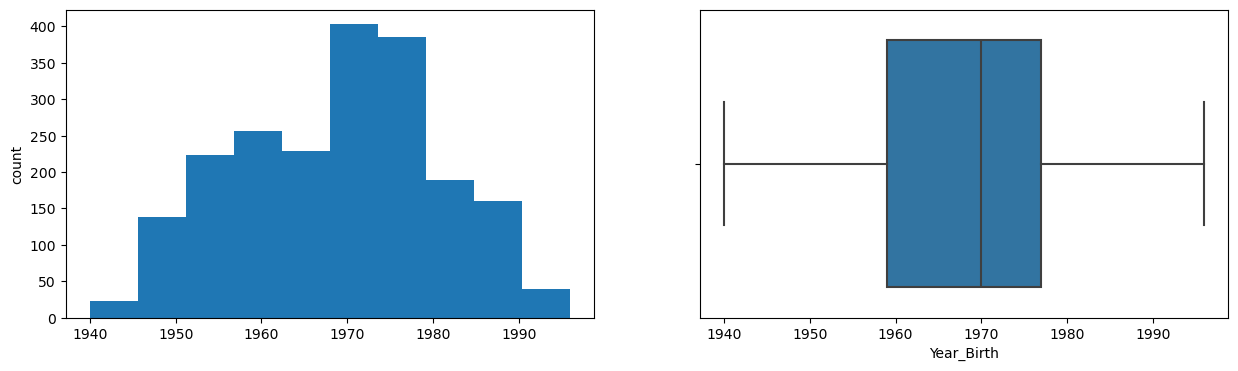

Income
Skew : 0.01


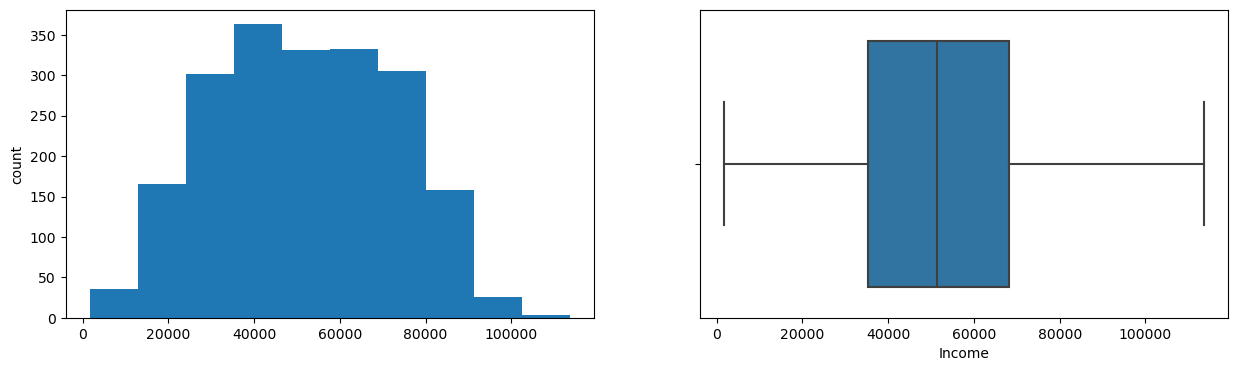

Kidhome
Skew : 0.62


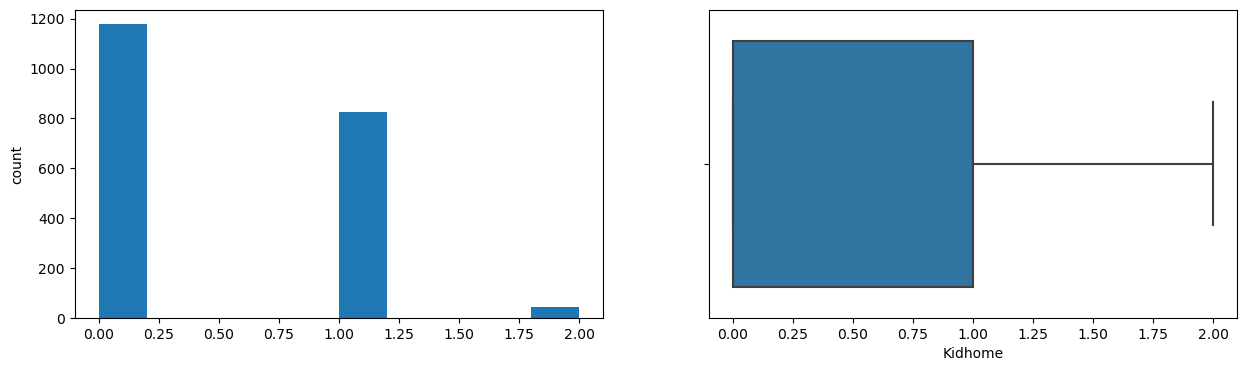

Teenhome
Skew : 0.41


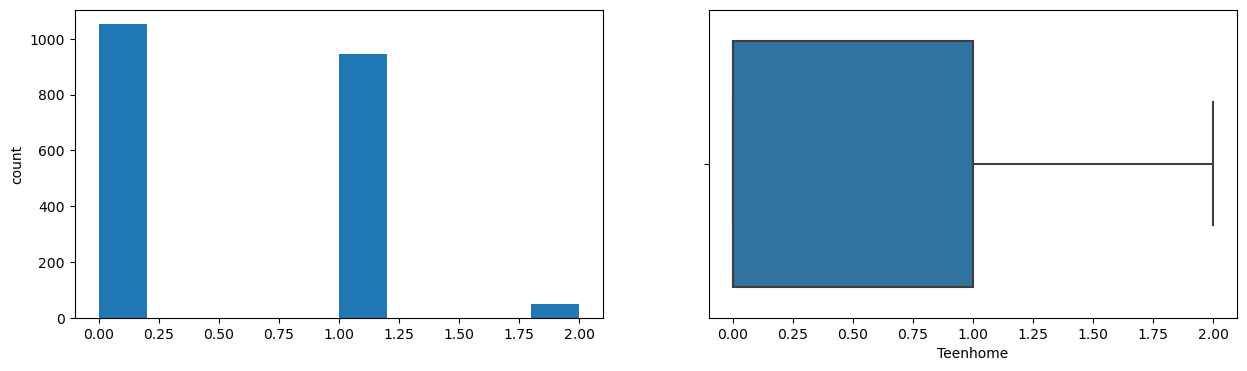

Recency
Skew : -0.0


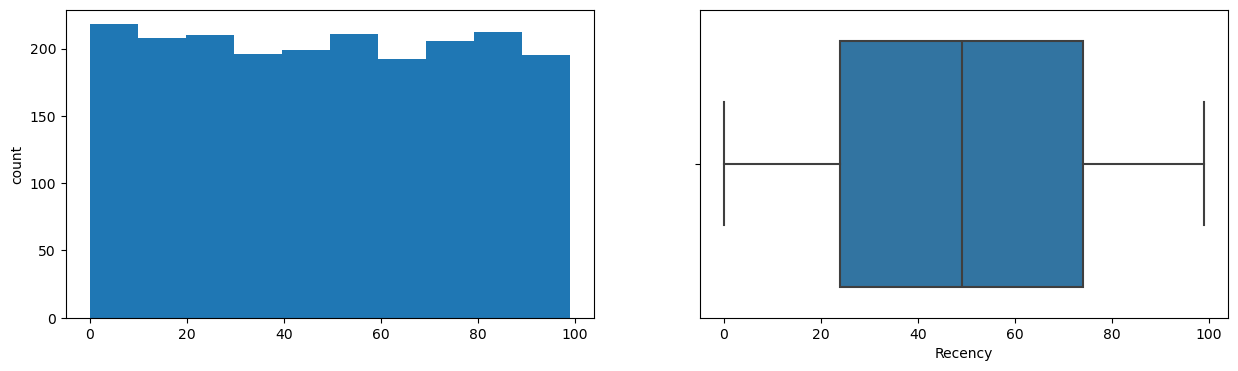

MntWines
Skew : 1.17


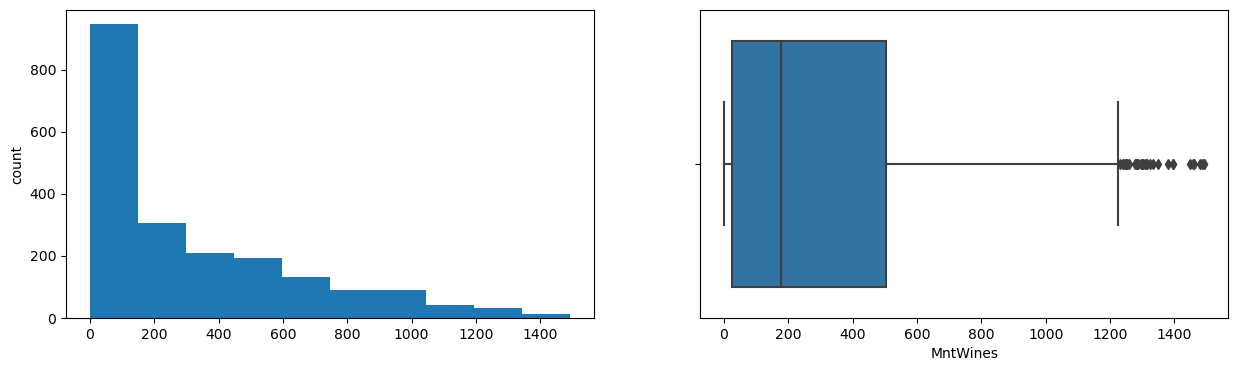

MntFruits
Skew : 2.11


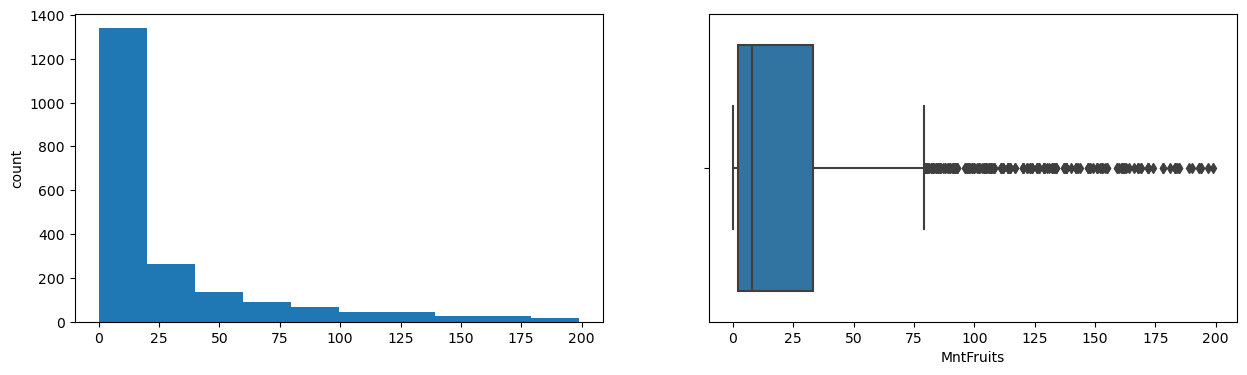

MntMeatProducts
Skew : 1.91


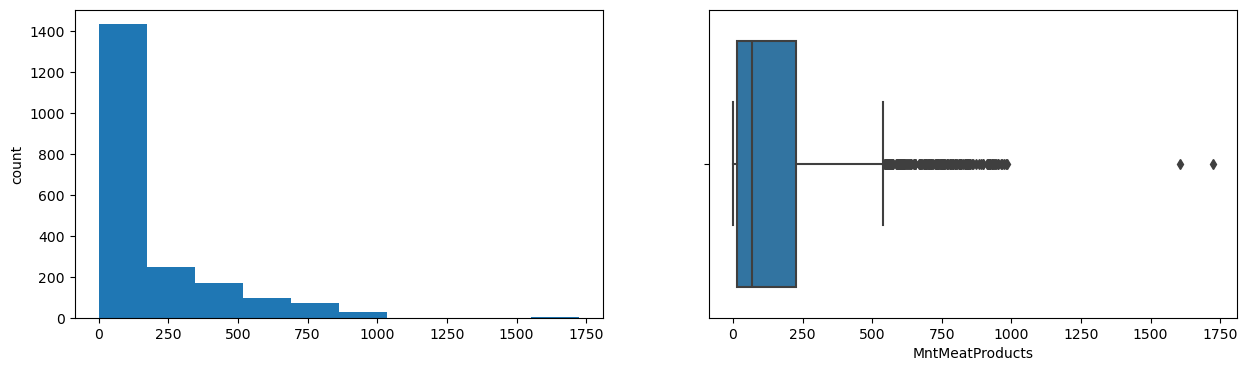

MntFishProducts
Skew : 1.93


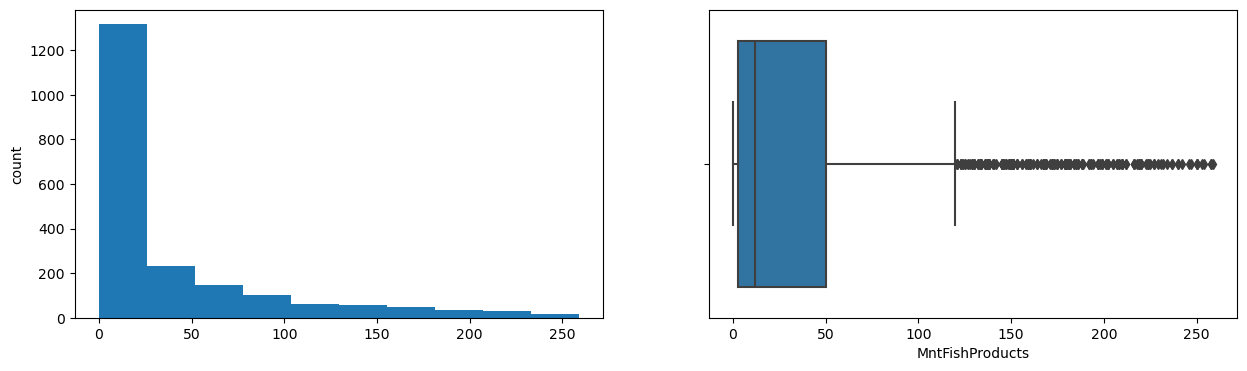

MntSweetProducts
Skew : 2.14


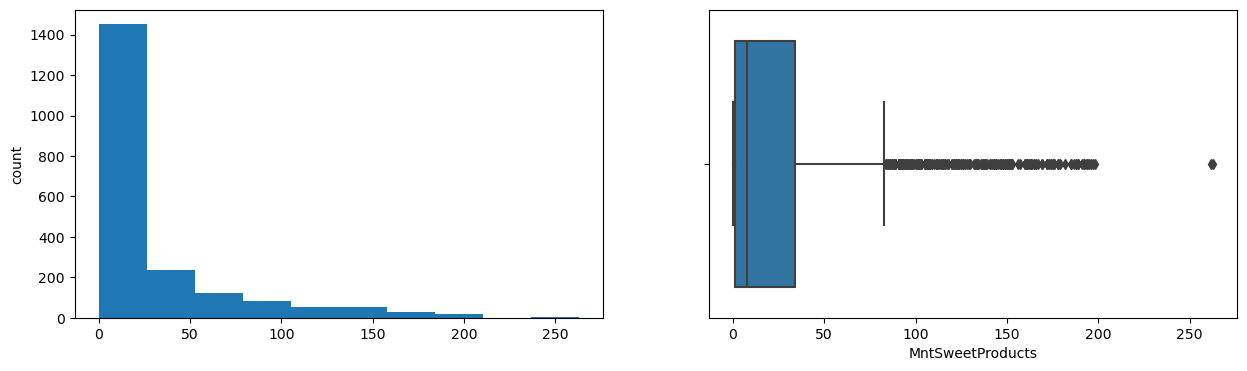

MntGoldProds
Skew : 1.9


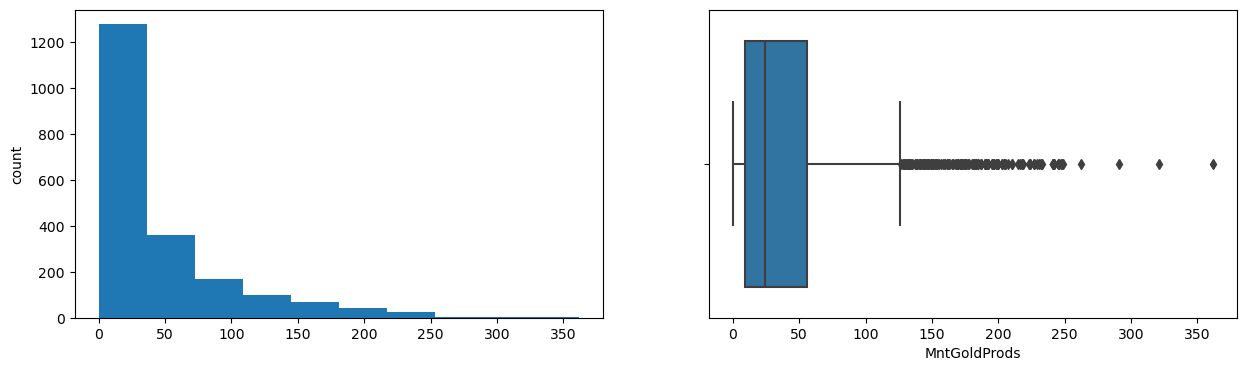

NumDealsPurchases
Skew : 2.34


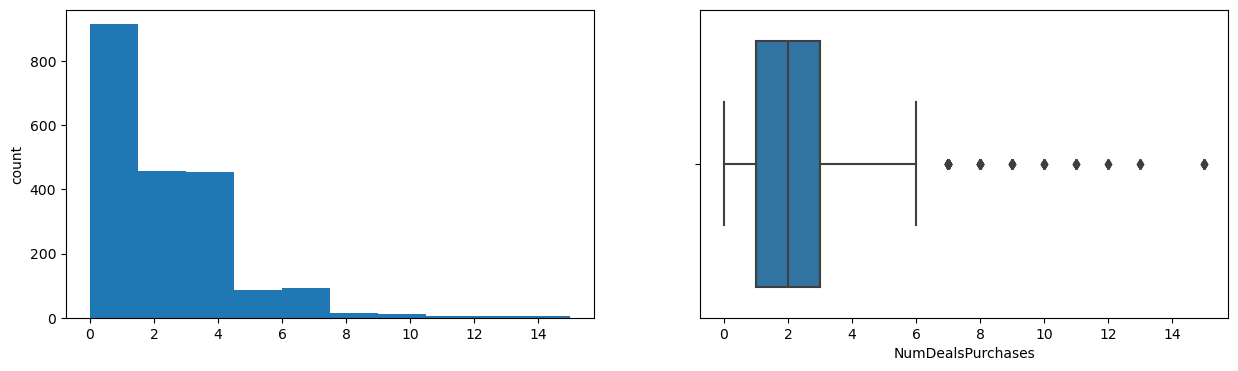

NumWebPurchases
Skew : 1.43


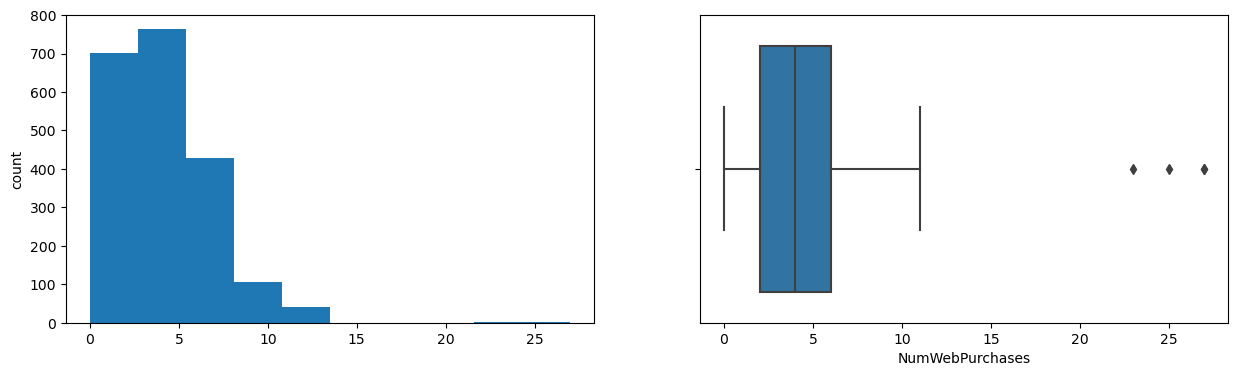

NumCatalogPurchases
Skew : 1.41


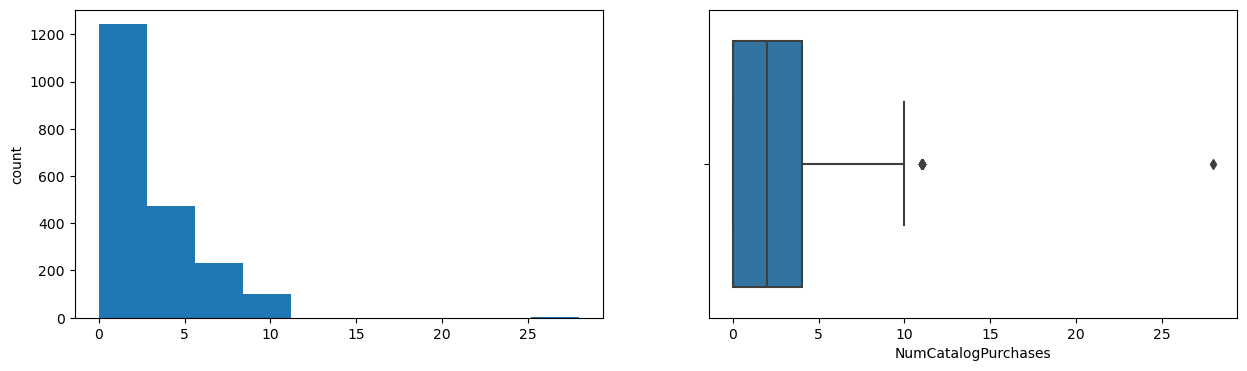

NumStorePurchases
Skew : 0.71


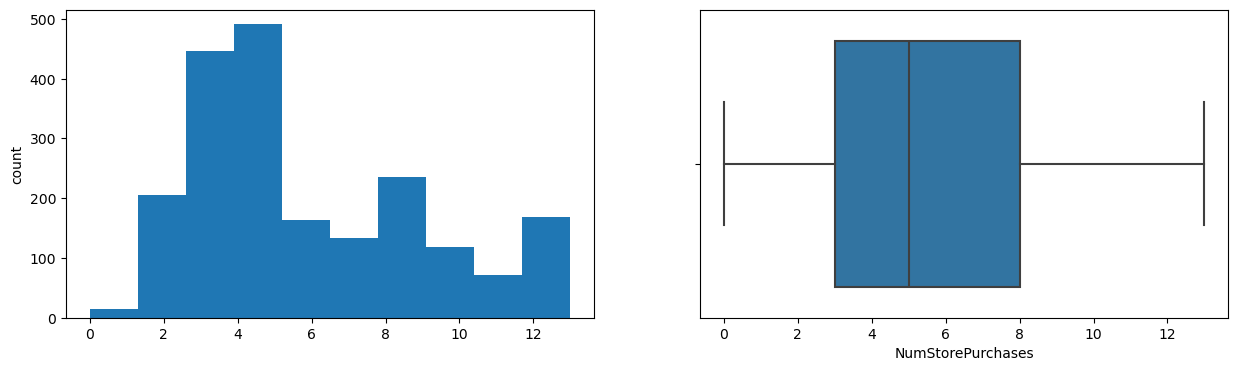

NumWebVisitsMonth
Skew : 0.27


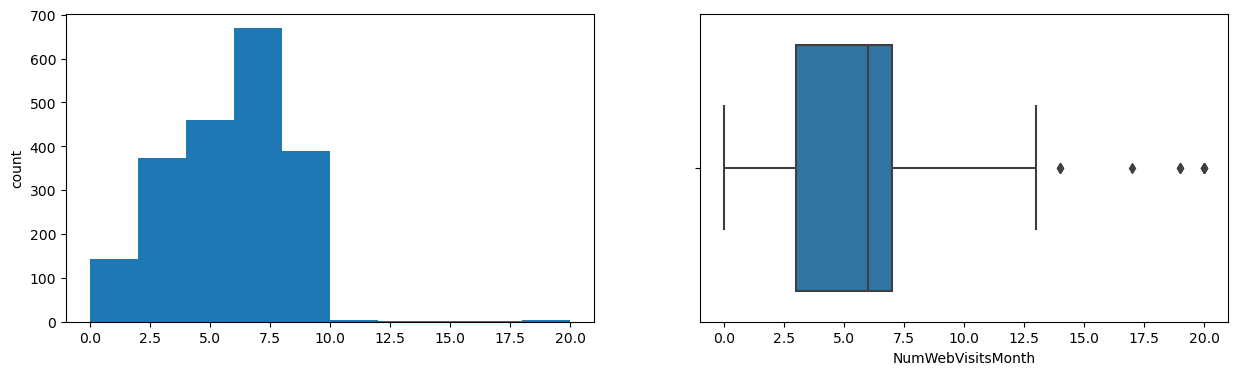

In [40]:
# Visualize every statistical variable column after outlier removal.
for col in stat_data.columns:
    # Show which column is plotted.
    print(col)
    # Calculate skewness.
    print('Skew :',round(data[col].skew(),2))
    # Set figure size.
    plt.figure(figsize = (15, 4))
    # Set subplot on the left.
    plt.subplot(1, 2, 1)
    # Plot histogram.
    data[col].hist(bins = 10, grid = False)
    # Label y-axis.
    plt.ylabel('count')
    # Set subplot on the right.
    plt.subplot(1, 2, 2)
    # Plot boxplot.
    sns.boxplot(x = data[col])
    # Display the plots.
    plt.show()

**Summary**

- Customer age and income are now evenly distributed.
- Customer age is evenly distributed. The majority customers were born in 1959 and 1977, with a few outliers on the lower end.
- Number of children is slightly right-skewed, and it no more than two. Number of teenagers are relatively evenly distributed, and it no more than two. Most customers have 0 and 1 kid/ teen at home. However, it does not indicate whether those customers are completely child-free. That proves the necessity of combining these two columns in one. (Even considered as categorical variable, Kidhome and Teenhome could be analyzed in the same way.)
- Regency is evenly distributed.
- All spending types, namely, wine, fruit, meat, fish, sweet, and gold products spendings, are highly right-skewed.
- Deal, web, and catalogue purchases are highly right-skewed. Store purchase is evenly distributed.
- Web visit is evenly distributed.

AcceptedCmp3


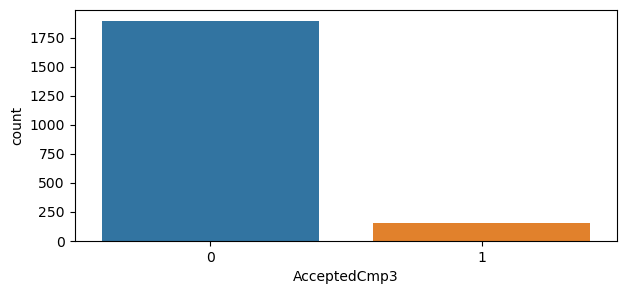

AcceptedCmp4


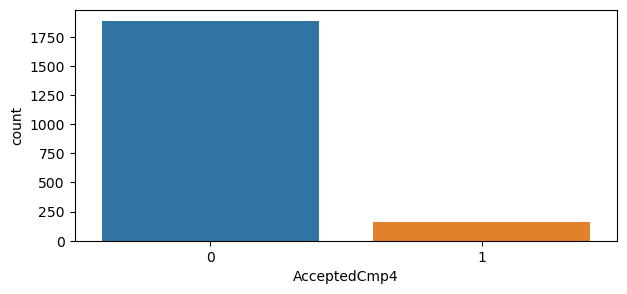

AcceptedCmp5


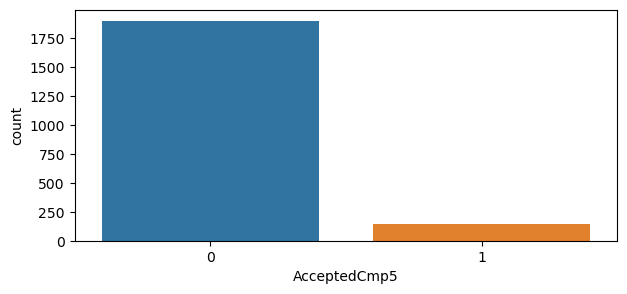

AcceptedCmp1


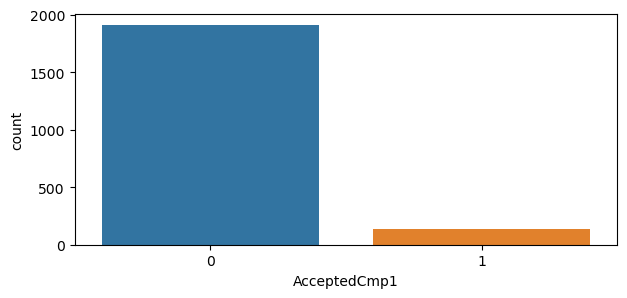

AcceptedCmp2


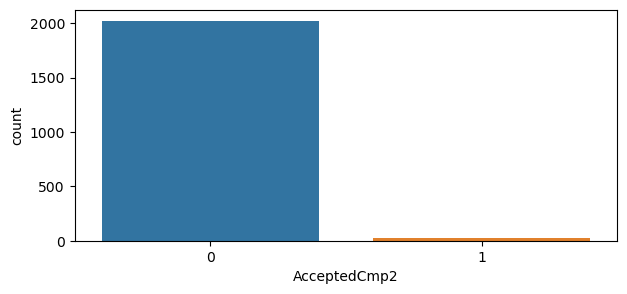

Complain


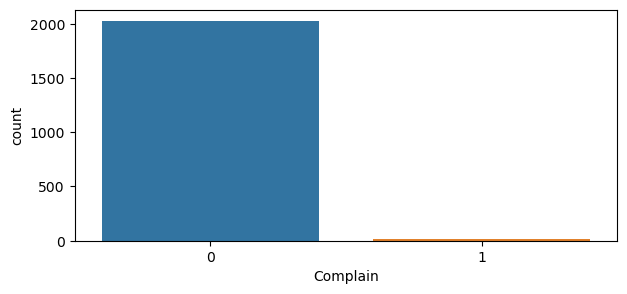

Response


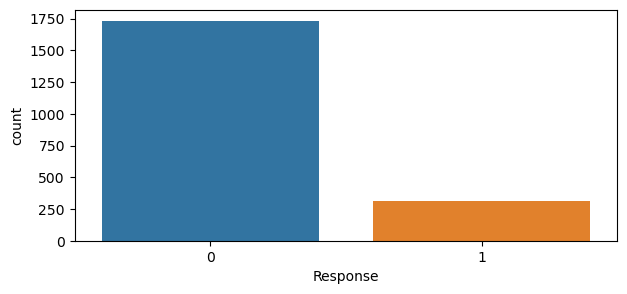

Education


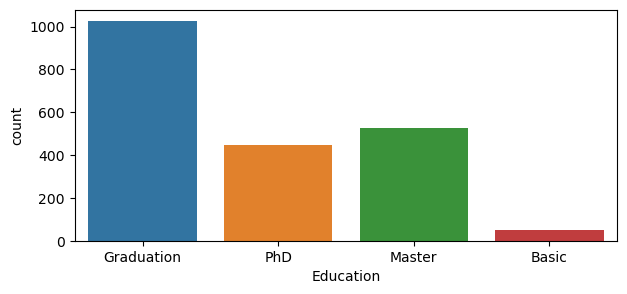

Marital_Status


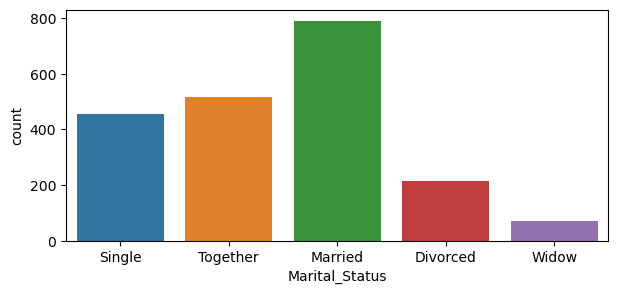

Dt_Customer


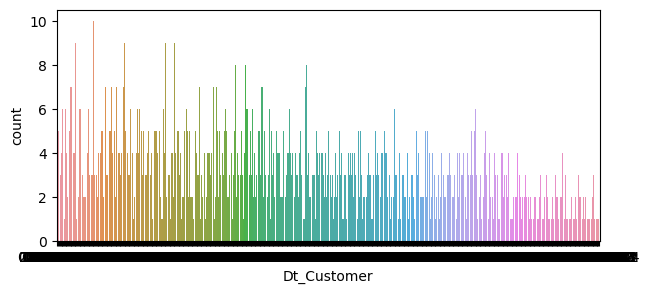

In [42]:
# Visualize every categorical variable column.
for col in categoricals:
    # Show which column is plotted.
    print(col)
    # Set figure size.
    plt.figure(figsize = (7, 3))
    # Plot countplot.
    sns.countplot(x=col, data=data)
    # Display the plots.
    plt.show()

**Summary**

- In each round of campaign, most customers chose not to accept. Notably, the latest compaign has the most acceptance.
- Compalint is negeligible.
- Customers with graduation are the majority. Customers with master degree are slightly more than PhD. There is a very small number customer with basic degree.
- Most customers have domestic parteners.
- Customer registration decreases overtime. This raises the concern of market saturation.

### **Bivariate Analysis**

#### **Numerical Variables Correlation**

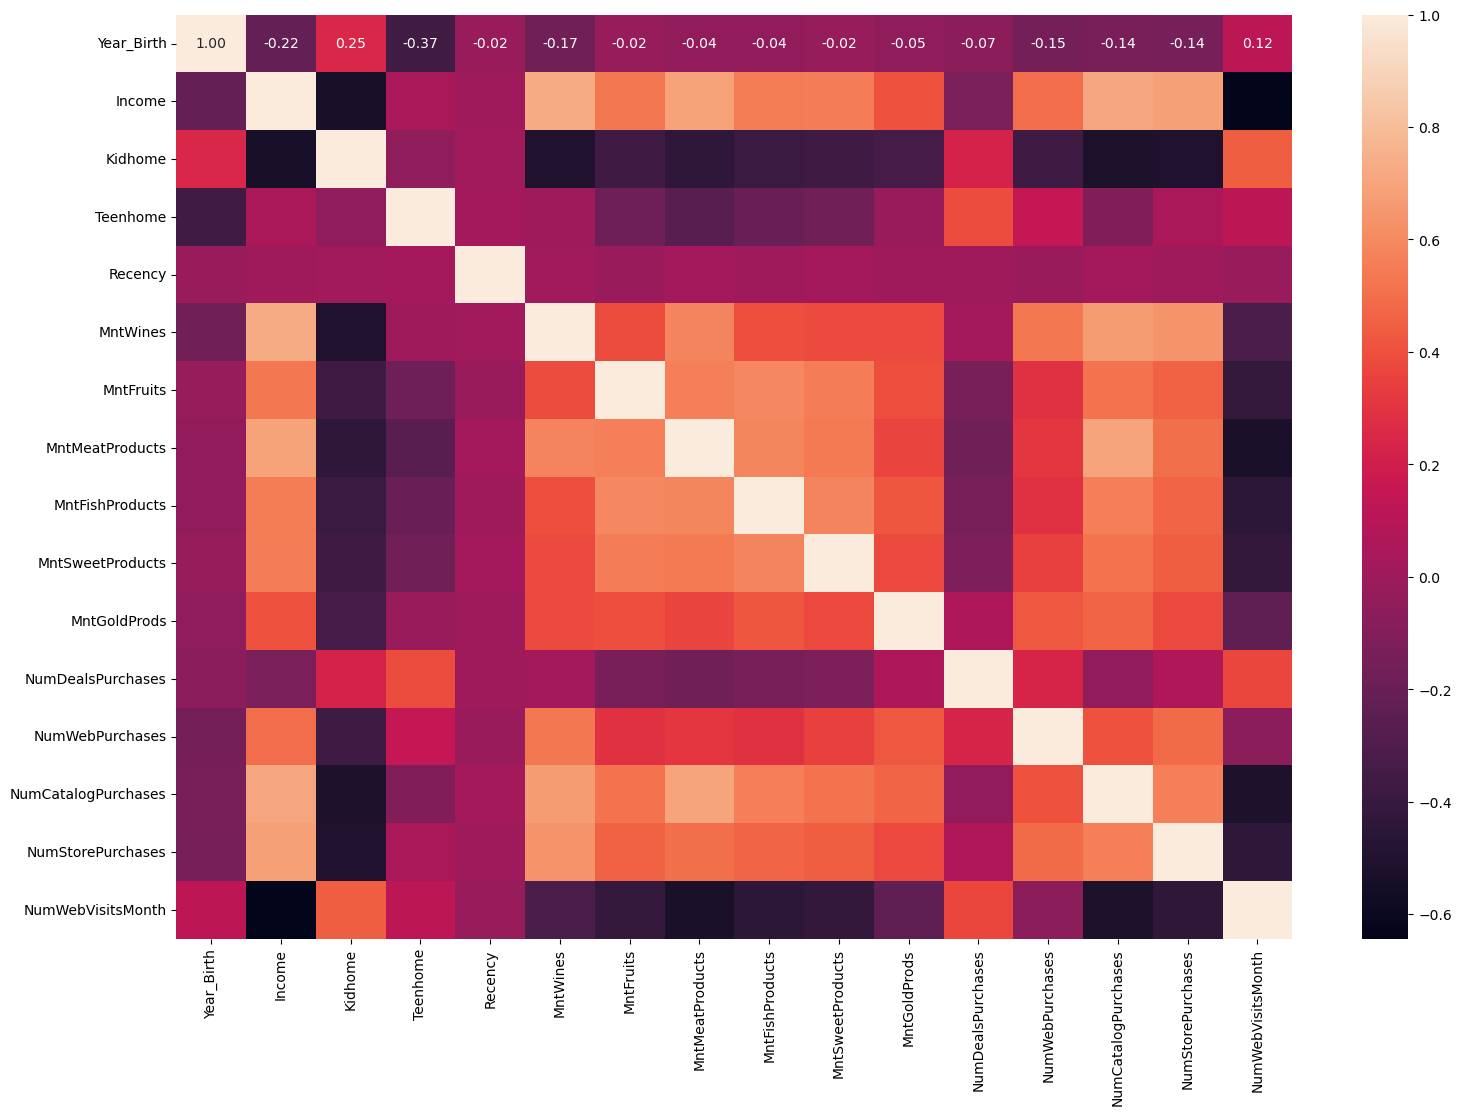

In [46]:
# Set figure size.
plt.figure(figsize=(18, 12))
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='0.2f')
# Display the plots.
plt.show()

**Summary**

- Year birth mostly has a negative correlation with other variables. In another word, customer age has positive correlation. However, the correlation is not strong.
- Income has a positive correlation with purchase amount.
- Kid and teen numbers, regency in general have low correlation with other variables.
- The amount of products have positive correlation with each other, with number of purchases (expcept deals), and with income. That indicates the listed products are all necessary for a household; customers buy those products through different channels; higher income customers need more products (or have higher purchase capability).
- Deal purchases mostly have negative correlation with other variables, especially product purchases. That indicates the deals are not run on the essential products for a household. Maybe the on-sale products are expensive/ non-supply such as electronics. From a different perspective, customers tend to buy those products when they are on sale.
- Web visit has highly negative correlation with income, amount of listed products, catalogue and store purchases. This indicates high-income customers have lower web visit, maybe because they have higher demand on products better to purchase in person; Wine might need offline ID check, fruits, meat, and fish need inspect their quality in store, so web visit are not for these products; catalogue and store purchase are alternate method compared to web visit.

#### **Categorical Variables Correlation**

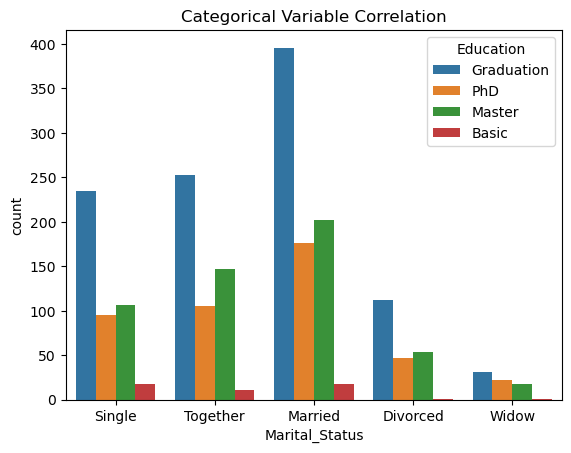

In [49]:
# Set a DataFrame of education level and marital status.
df = pd.DataFrame({'Marital_Status': data['Marital_Status'], 'Education': data['Education']})
# Draw a count plot.
sns.countplot(x='Marital_Status', hue='Education', data=df)
# Set plot title.
plt.title("Categorical Variable Correlation")
# Display the plot.
plt.show()

**Summary**

- Education level in each marital status falls in the same pattern as the overall distribution of education.
- As a result, education level has no impact on marital status.

#### **Categorical and Numerical Variable Correlation**

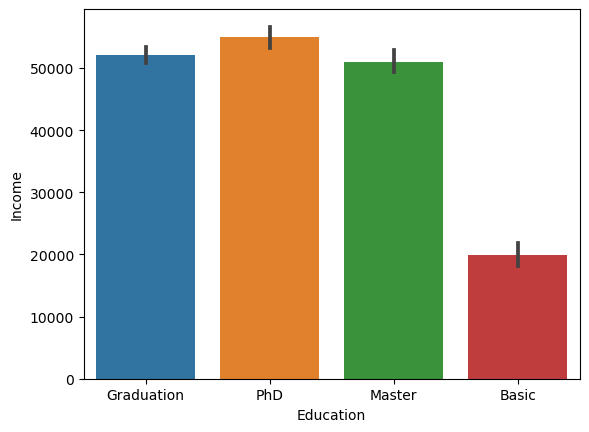

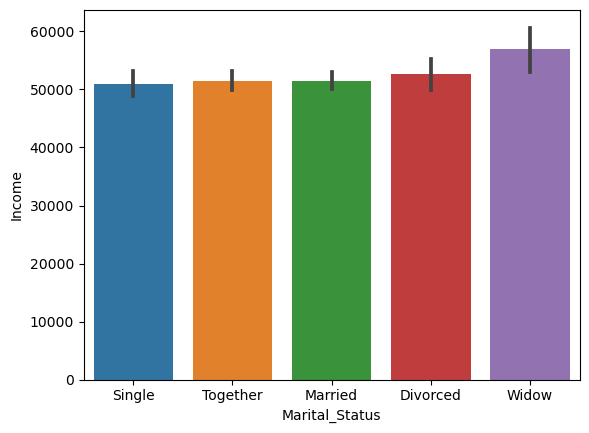

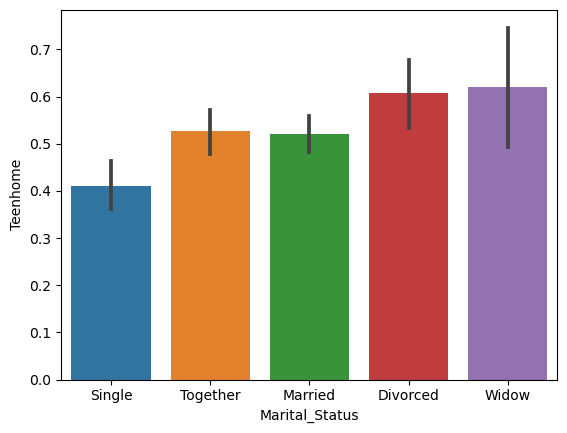

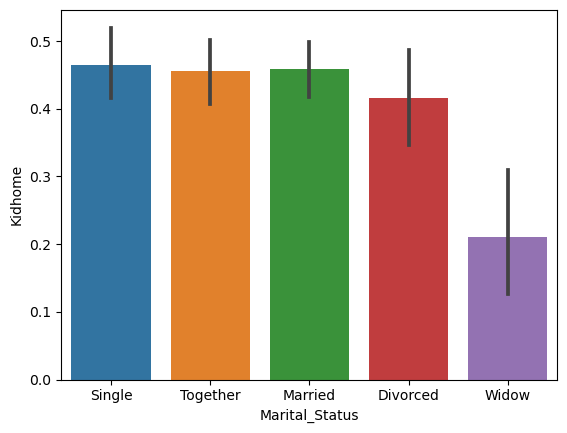

In [52]:
sns.barplot(x=data['Education'], y=data['Income'])
plt.show()
sns.barplot(x=data['Marital_Status'], y=data['Income'])
plt.show()
sns.barplot(x=data['Marital_Status'], y=data['Teenhome'])
plt.show()
sns.barplot(x=data['Marital_Status'], y=data['Kidhome'])
plt.show()

**Summary**

- Overall, income incresaes as education level increases.
- Widows have higher income than other groups. Singles slightly fall behind compared to others.
- Widows have the most teenagers, but the least kids. That could be because widows become such status at an older age when their kids grow to teenagers.

### **Feature Engineering and Data Processing**

#### **Missing Value Treatment**

In [56]:
# Exam missing values.
data.loc[data['Income'].isnull(), 'Income']

10     NaN
27     NaN
43     NaN
48     NaN
58     NaN
71     NaN
90     NaN
91     NaN
92     NaN
128    NaN
133    NaN
312    NaN
319    NaN
1379   NaN
1382   NaN
1383   NaN
1386   NaN
2059   NaN
2061   NaN
2078   NaN
2079   NaN
2081   NaN
2084   NaN
2228   NaN
Name: Income, dtype: float64

In [57]:
# Fill missing values with median.
data.Income.fillna(data.Income.median(), inplace = True)

#### **Feature Engineering**

**Calculate age and total kids.**

In [60]:
# Create a new column of customer age.
data["Age"] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year)
# Create a new column of total kids.
data['Kids'] = data['Kidhome'] + data['Teenhome']

**Calculate family size.**

In [62]:
# Create a new column of "Family_Size". Initialized with column 'Marital_Status'.
data['Family_Size'] = data['Marital_Status']
# Under column Family_Size, replace 'Divorced', 'Widow', 'Single' with 1, and 'Together', 'Married' with 2.
data["Family_Size"] = data["Family_Size"].replace({'Divorced': 1, 'Widow': 1, 'Single': 1, 'Together': 2, 'Married': 2})
# Add kid number to column 'Family_Size'.
data['Family_Size'] = data['Kids'] + data['Family_Size']

**Sum up Expenses, Purchases, Accepted Campaigns.**

In [64]:
# Create a new column of 'Expenses' and sum up products.
data["Expenses"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
# Create a new column of 'TotalPurchases' and sum up purchases.
data["NumTotalPurchases"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
# Create a new column of 'EngagedDays' and sum up accepted campaigns..
data["TotalAcceptedCmp"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

**Calculate Customer Engagement.**

In [66]:
# Convert Dt_customer variable to Python date time object.
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')
# Assume the day when the analysis is run.
today =  pd.to_datetime("01-01-2016")
# Create a new column of 'EngagedDays'.
data["EngagedDays"] = (today - data["Dt_Customer"]).dt.days
# Display the range of customer engagement.
print("Customer engagement ranges from {} days to {} days.".format(data["EngagedDays"].min(), data["EngagedDays"].max()))

Customer engagement ranges from 551 days to 1250 days.


**Calculate Expense per Purchase.**

In [68]:
# Create a new column of 'AmountPerPurchase'.
data['AmountPerPurchase'] = data['Expenses'] / data['NumTotalPurchases']
# Drop invalid observations.
data = data.drop(data[data['AmountPerPurchase']==data['AmountPerPurchase'].max()].index)

### **Additional Bivariate Analysis**

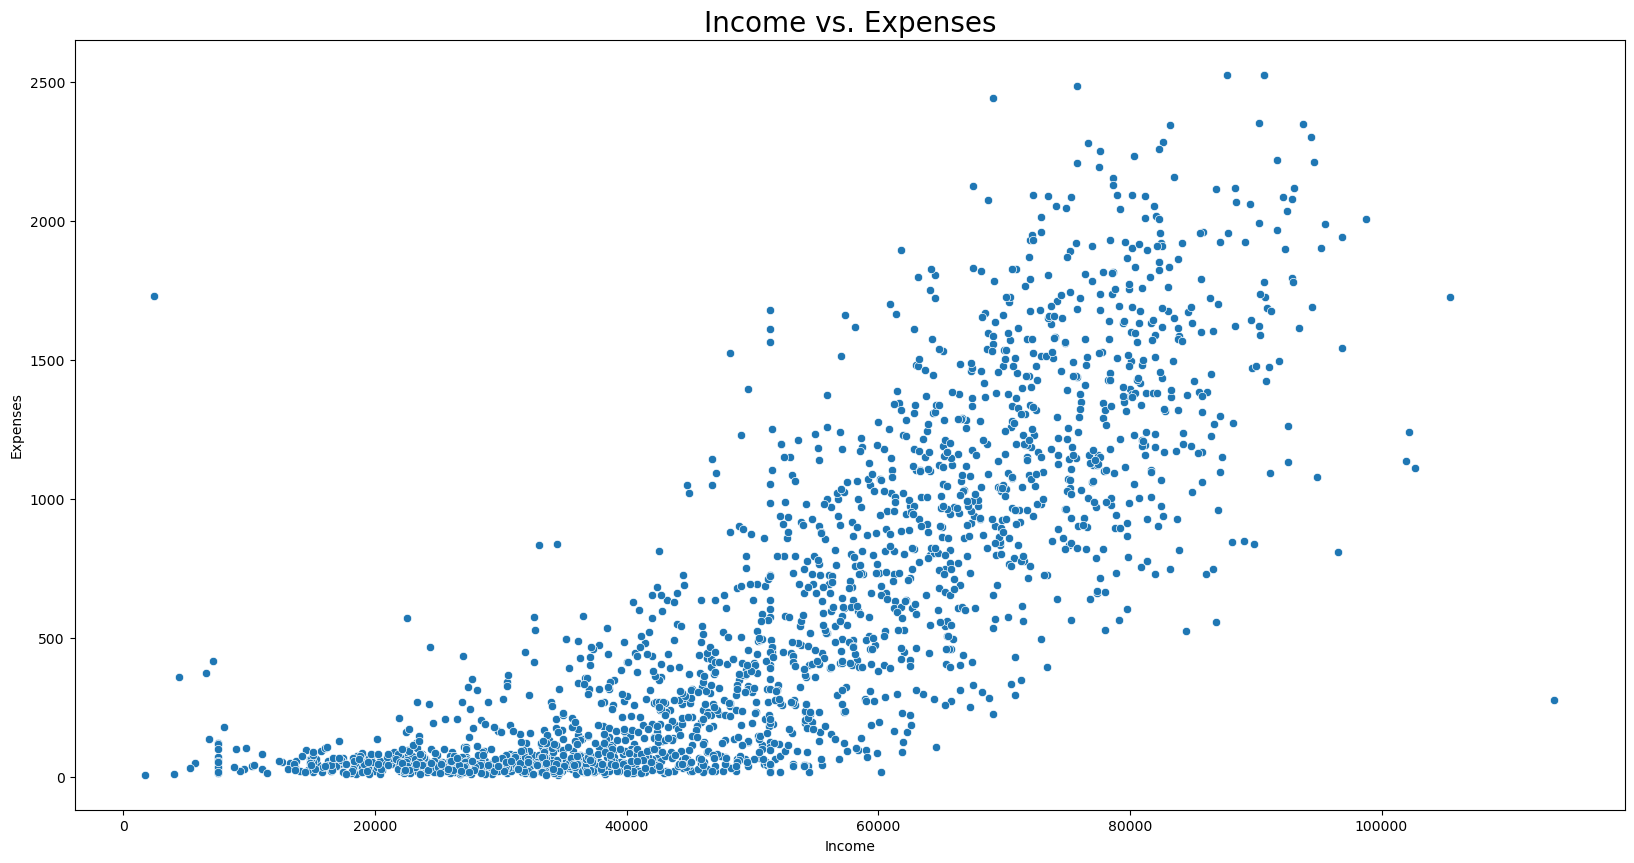

In [70]:
# Set figure size.
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['Income'], y=data['Expenses'])
# Label x axis.
plt.xlabel("Income")
# Label y axis.
plt.ylabel("Expenses")
# Set the plot title.
plt.title("Income vs. Expenses", fontsize=20)
# Display the plot.
plt.show()

**Observations**

- Customers who make less than 40000 have a lower expense range; those who make more than 40000 have a wider expense range.
- The higher income is, the wider expense range will be.
- The minimum expense remains the same until income at 60000. It increases as customer income increase from 60000.

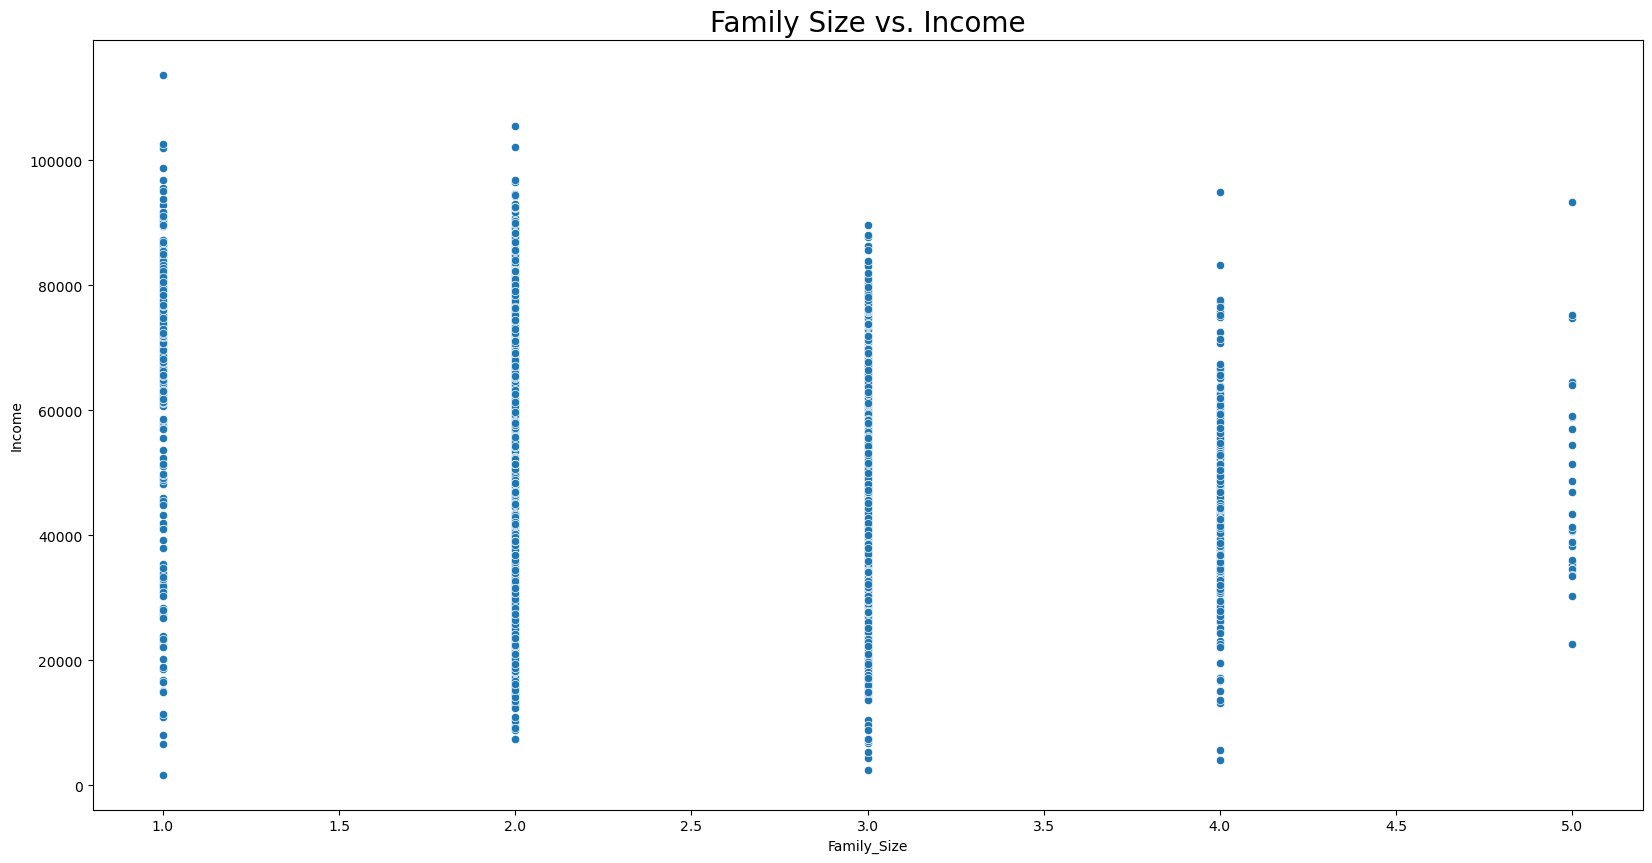

In [72]:
# Set figure size.
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['Family_Size'], y=data['Income'])
# Label x axis.
plt.xlabel("Family_Size")
# Label y axis.
plt.ylabel("Income")
# Set the plot title.
plt.title("Family Size vs. Income", fontsize=20)
# Display the plot.
plt.show()

**Observations**

- Customers from a family of 5 have a higher minimum income and narrow range. However, their maximum income is not the highest among the groups.
- Customers by themselves have the widest income range, with their minimum as the lowest among the groups, and maximum highest among the groups.

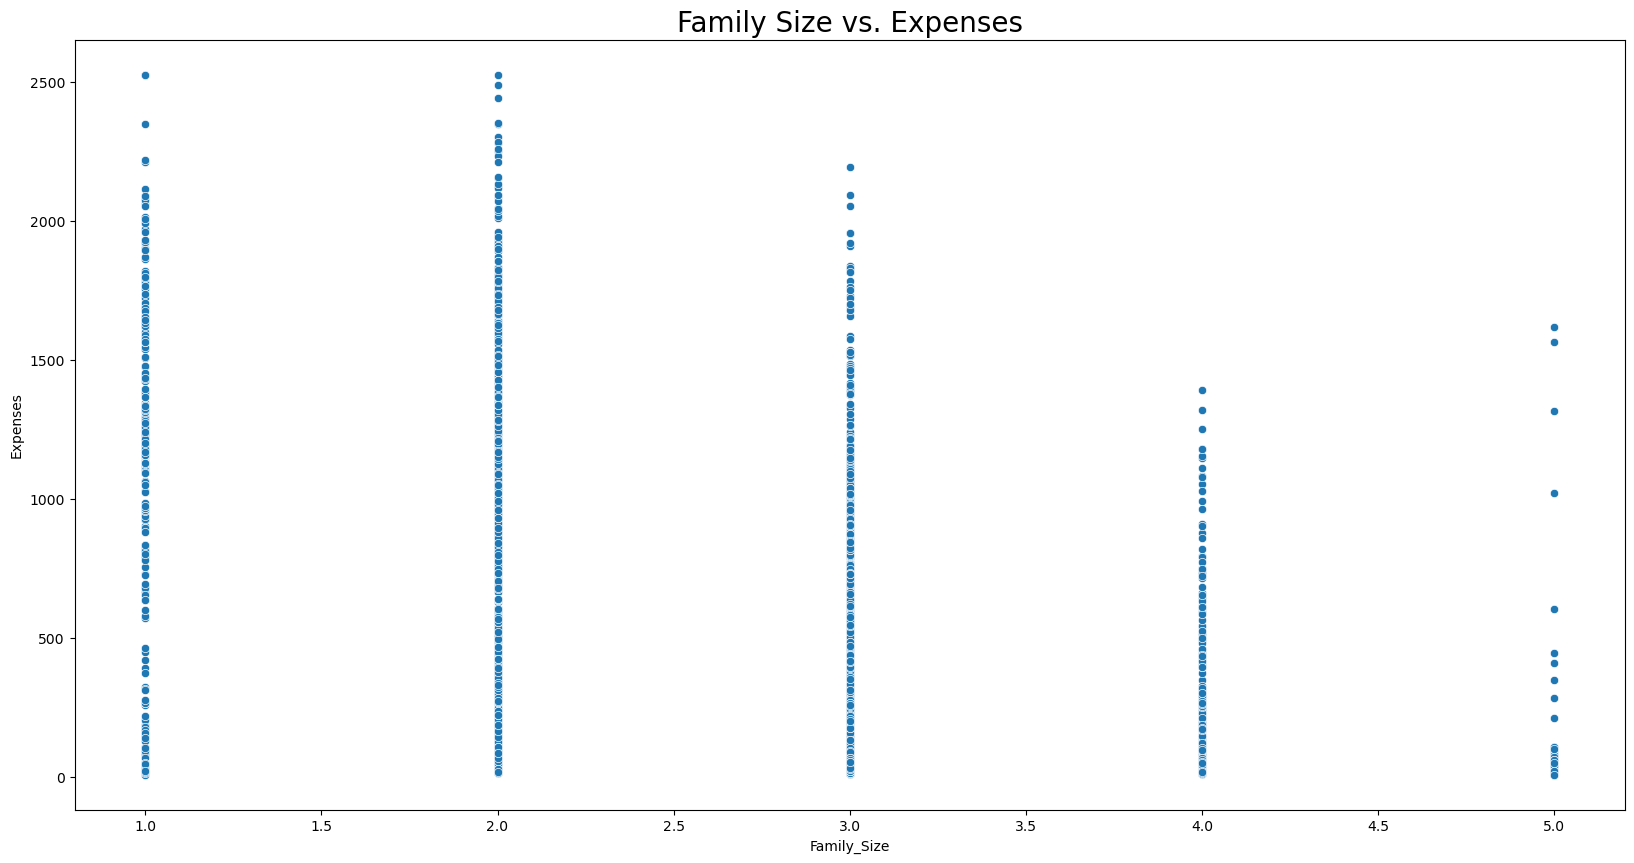

In [74]:
# Set figure size.
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['Family_Size'], y=data['Expenses'])
# Label x axis.
plt.xlabel("Family_Size")
# Label y axis.
plt.ylabel("Expenses")
# Set the plot title.
plt.title("Family Size vs. Expenses", fontsize=20)
# Display the plot.
plt.show()

**Observations**

- When comparing the maximum expenses for each household, surprisingly, the larger the household is, the lower the expense will be.
- In reference with income chart, it could be because larger families save money more wisely.

## **VI. Scaling and PCA / Tsne**

### **Data Preparation for Segmentation**

In [78]:
# Drop non-behavioral columns and save to a new DataFrame.
data_segment = data.drop(
    columns=[
        "Year_Birth",       # It is an indirect variable to show customer age. Column Age has been created instead.
        "Dt_Customer",      # It is an indirect variable to show how long a customer is with the company. Column EngagedDays has been created instead.
        "Complain",         # 95% customers do not have complaints. This variable makes too little impact.
        "Response",         # Campaign acceptances are too detailed. Column TotalAcceptedCmp has been created. Same for columns below.
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        'Marital_Status',   # It is a categorical variable that does not directly impact purchases.
        "Kids",             # It is too detailed. Column Family_Size has been created.
        'Education',        # It is a categorical variable that does not directly impact purchases.
        'Kidhome',          # It is too detailed. Column Family_Size has been created.
        'Teenhome',         # It is too detailed. Column Family_Size has been created.
        'Income',           # It is demographic instead of behavioral.
        'Age',              # It is demographic instead of behavioral.
        'Family_Size'       # It is demographic instead of behavioral.
    ],
    axis=1,
)

In [79]:
# Show the dimension of data.
data_segment.shape

(2045, 17)

In [80]:
# Show the first five observations.
data_segment.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,TotalAcceptedCmp,EngagedDays,AmountPerPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,1617,25,1,1214,64.680000
1,38,11,1,6,2,1,6,2,1,1,2,5,27,6,0,664,4.500000
2,26,426,49,127,111,21,42,1,8,2,10,4,776,21,0,863,36.952381
3,26,11,4,20,10,3,5,2,2,0,4,6,53,8,0,690,6.625000
4,94,173,43,118,46,27,15,5,5,3,6,5,422,19,0,712,22.210526


In [81]:
# Show the last five observations.
data_segment.tail()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,TotalAcceptedCmp,EngagedDays,AmountPerPurchase
2232,50,5,1,6,3,4,3,1,0,0,3,4,22,4,0,1232,5.500000
2235,46,709,43,182,42,118,247,2,9,3,4,5,1341,18,0,932,74.500000
2237,91,908,48,217,32,12,24,1,2,3,13,6,1241,19,1,706,65.315789
2238,8,428,30,214,80,30,61,2,6,5,10,3,843,23,0,707,36.652174
2239,40,84,3,61,2,1,21,3,3,1,4,7,172,11,1,1173,15.636364


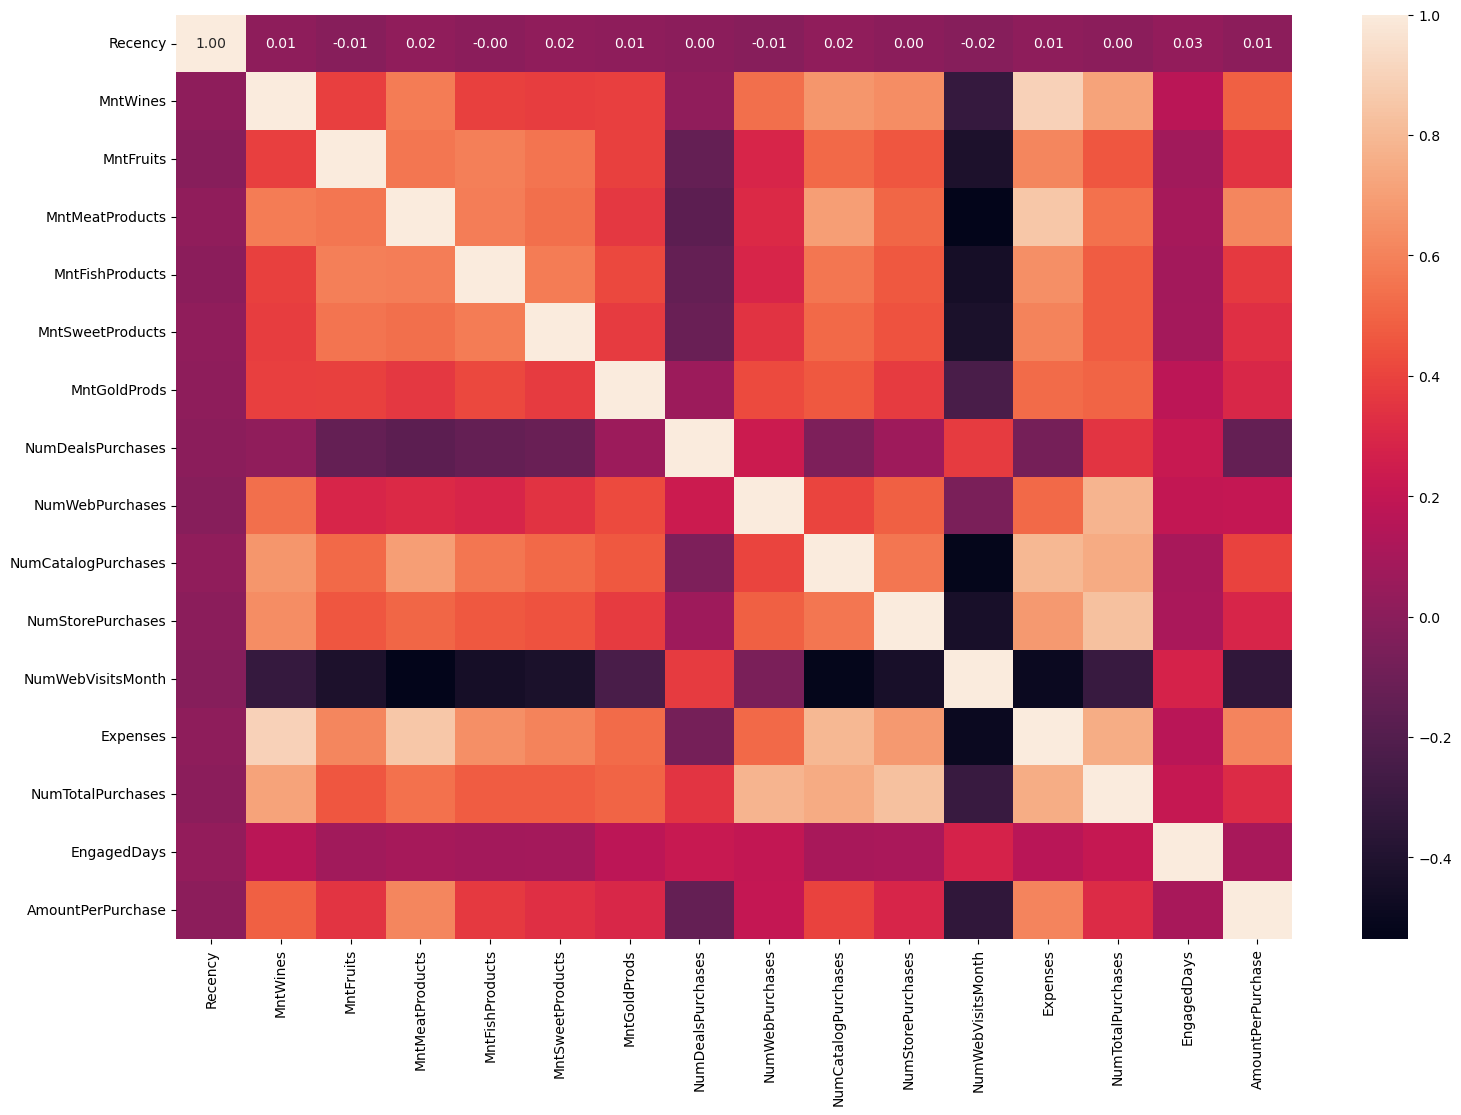

In [82]:
# Set figure size.
plt.figure(figsize=(18, 12))
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data_segment.corr(numeric_only=True), annot=True, fmt='0.2f')
# Display the plots.
plt.show()

**Observations**

- Regency has no correlation with other variables.
- The expenses have positive correlation with each other. This indicates they are all necessary for daily life.
- Deal purchases have negative correlation with expenses. This indicates the deals are run for products that are not necessary to daily life.
- Other purchases have positive correlation with each other.
- Webvisits mostly have negative correlation with other variables. It has positive correlation with deal purchases, maybe because customers do online shopping for those items; same for engaged days.

### **Data Scaling**

In [85]:
# Set scaler.
scaler = StandardScaler()
# Scale the data.
data_scaled = pd.DataFrame(scaler.fit_transform(data_segment), columns = data_segment.columns)
# Show the first five observations.
data_scaled.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,TotalAcceptedCmp,EngagedDays,AmountPerPurchase
0,0.311976,0.979138,1.552261,1.715764,2.457358,1.452556,0.845257,0.349132,1.390036,2.634483,-0.558248,0.691927,1.680243,1.331660,0.612578,1.534151,0.675594
1,-0.378117,-0.874388,-0.636841,-0.722785,-0.648410,-0.629756,-0.730485,-0.176623,-1.117318,-0.585149,-1.178354,-0.137007,-0.963715,-1.171322,-0.509933,-1.185949,-0.624126
2,-0.792173,0.358325,0.570940,-0.176369,1.342935,-0.151063,-0.038696,-0.702378,1.390036,-0.227412,1.302072,-0.551475,0.281773,0.804716,-0.509933,-0.201768,0.076755
3,-0.792173,-0.874388,-0.561355,-0.659563,-0.502256,-0.581886,-0.749701,-0.176623,-0.759125,-0.942886,-0.558248,0.277460,-0.920480,-0.907850,-0.509933,-1.057363,-0.578232
4,1.554144,-0.393184,0.419967,-0.217012,0.155436,-0.007455,-0.557538,1.400642,0.315455,0.130325,0.061859,-0.137007,-0.306882,0.541245,-0.509933,-0.948559,-0.241628


### **T-SNE**

In [87]:
# Apply the t-SNE algorithm with random_state = 1
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 40)
# Fit and transform the t-SNE function on scaled data.
data_tsne = pd.DataFrame(tsne.fit_transform(data_scaled))
# Set column names.
data_tsne.columns = ['X1', 'X2']

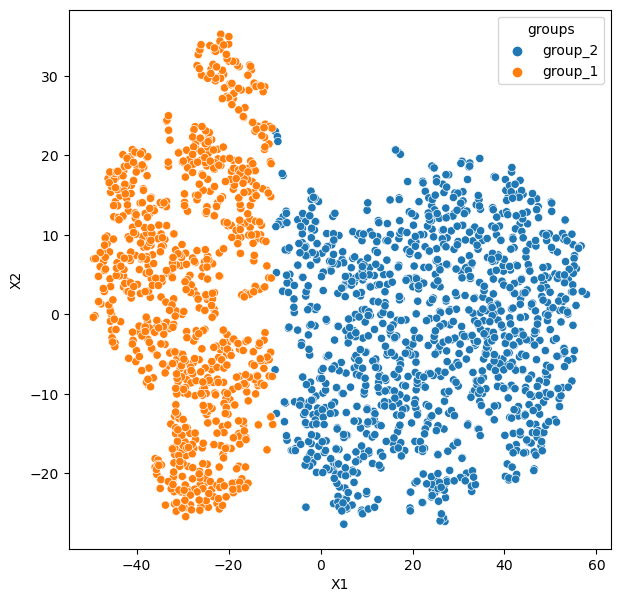

In [88]:
def group_tsne(x):
    """
    Group the scattered data points by visual separation along x and y axes.

    Parameters
    ----------
    x : pandas.core.series.Series
        t-SNE data set.

    Returns
    -------
    str
        group_[number].

    """
    # Subtract the first two components.
    first_component = x[0]
    second_component = x[1]
    # First, group the left data points.
    if first_component < -10:
        return 'group_1'
    # Second group the right data points.
    else: 
        return 'group_2'

# Apply the group function to t-SNE data set.
data_tsne['groups'] = data_tsne.apply(group_tsne, axis = 1)
# Set figure size.
plt.figure(figsize = (7, 7))
# Draw a scatter plot for two components with hue.
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')
# Label x-axis.
plt.xlabel("X1")
# Label y-axis.
plt.ylabel("X2")
# Display the plot.
plt.show()

### **PCA and dimension reduction**

In [90]:
# Define the number of principal components to generate 
n = data_scaled.shape[1]
# Find principal components for the data.
pca = PCA(n_components = n, random_state = 1)
# Fit and transform the pca function on scaled data.
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

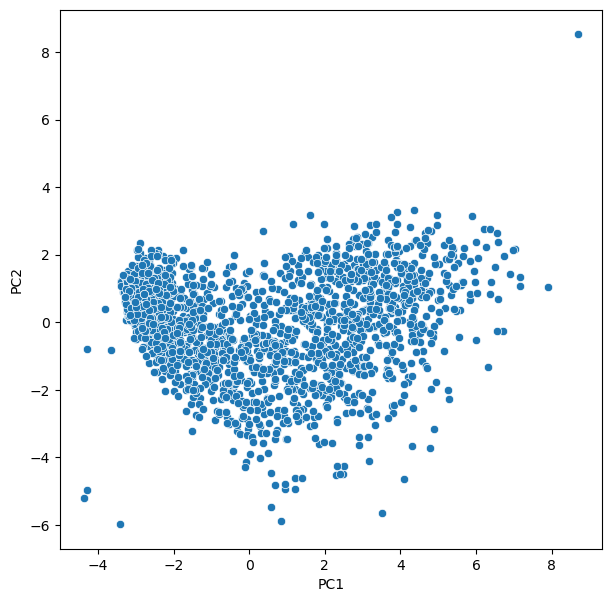

In [91]:
# Set figure size.
plt.figure(figsize = (7, 7))
# Draw a scatterplot of the first two PCs.
sns.scatterplot(x = data_pca[0], y = data_pca[1])
# Label x-axis.
plt.xlabel("PC1")
# Label y-axis.
plt.ylabel("PC2")
# Display the plot.
plt.show()

## **VII. K-Means with its best K value**

#### **Model comparison based on previous study**
- K-Means, K-Medoids, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Model were carried out. K-Means excels as the best modelling solution.

- K-Means has two clusters and a silhouette score of 0.347.

### **Applying KMeans on the PCA data and visualize the clusters**

In [95]:
# Apply K-Means algorithm.
kmeans = KMeans(n_clusters = 2, random_state = 1)
# Fit the kmeans function on the pca components.
kmeans.fit(data_pca)
# Add predicted labels to the PCA data on the pca components from K-Means.
data_pca['KMeans_Labels'] = kmeans.labels_
# Add predicted labels to the original data on the pca components from K-Means.
data['KMeans_Labels'] = kmeans.labels_
# Add predicted labels to the segmentation data on the pca components from K-Means.
data_segment['KMeans_Labels'] = kmeans.labels_
# Count observations in each cluster.
data_segment.KMeans_Labels.value_counts()

KMeans_Labels
1    1195
0     850
Name: count, dtype: int64

In [96]:
# Implement a plot function for later convenience.
def plot_segmentation(X, Y, pca_data, cluster):
    """
    Plot data segments based on PCA data set.

    Parameters
    ----------
    X : int
        Column index from PCA data. Used as x axis in the plot.
    Y : int
        Column index from PCA data. Used as y axis in the plot.
    PCA : DataFrame
        PCA data set.
    cluster : str
        Column name from PCA data that indicates the cluster.

    Returns
    -------
    None.

    """
    sns.scatterplot(x=X, y=Y, data=pca_data, hue=cluster)

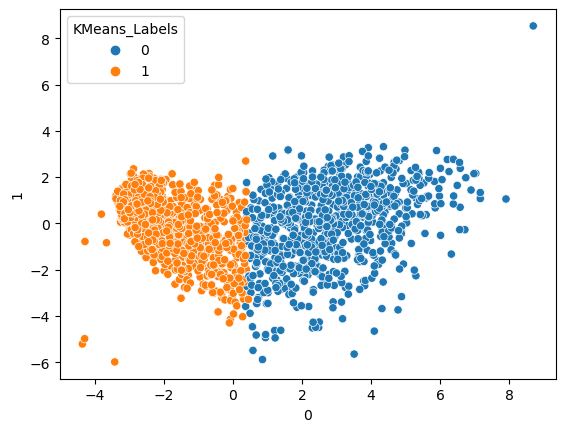

In [97]:
# Plot data segmentation.
plot_segmentation(0, 1, data_pca, 'KMeans_Labels')

### **Profiling**

In [99]:
# Group data by cluster labels and compute the mean.
cluster_KMeans_Labels = data_segment.groupby("KMeans_Labels").mean()
# Highlight the max values in each row (feature-wise max across clusters).
cluster_KMeans_Labels.style.highlight_max(color="lightgreen", axis=0)

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,TotalAcceptedCmp,EngagedDays,AmountPerPurchase
KMeans_Labels,,,,,,,,,,,,,,,,,
0,49.175294,605.547059,54.170588,350.505882,76.772941,56.725882,75.425882,2.209412,5.895294,5.148235,8.536471,3.889412,1219.148235,21.789412,0.802353,935.637647,60.575192
1,48.804184,91.851046,6.492050,34.856904,9.551464,6.389121,21.670293,2.425941,2.856067,0.848536,3.854393,6.355649,170.810879,9.984937,0.206695,881.148954,14.067693


In [100]:
# Make a list of variables for boxplot plotting. This makes later steps convenient.
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','EngagedDays','TotalAcceptedCmp','AmountPerPurchase']

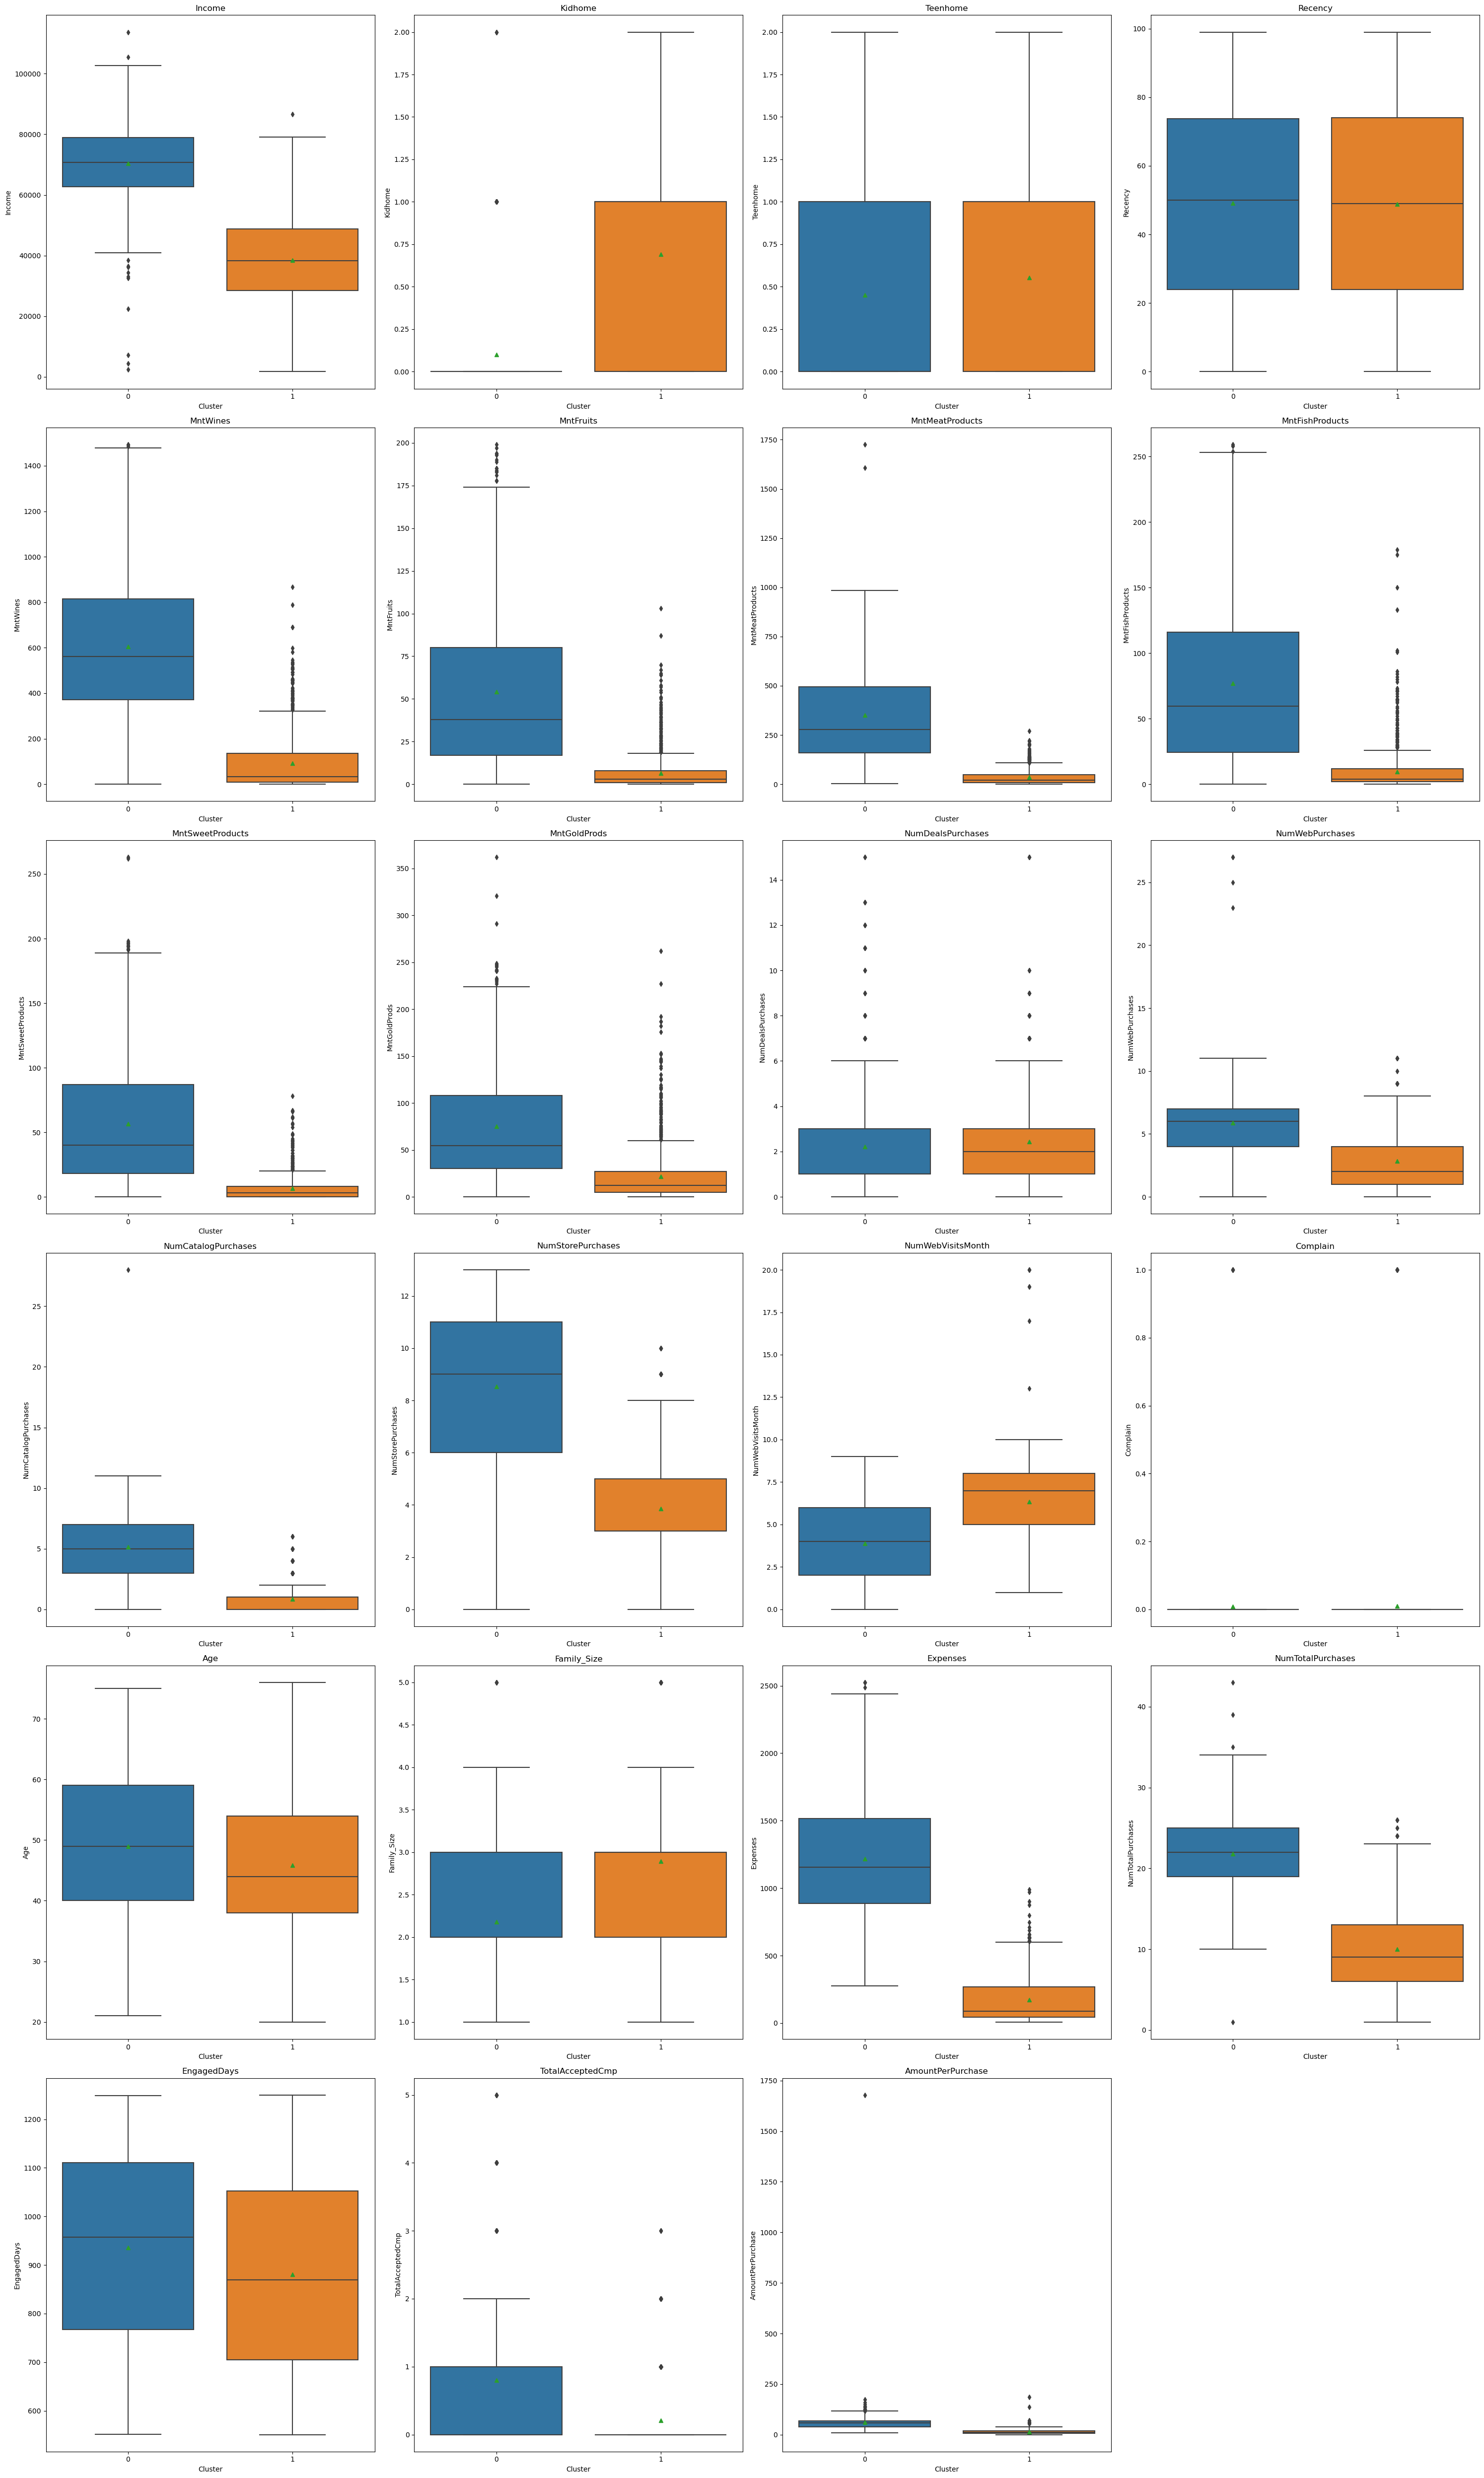

In [101]:
# Set figure size.
plt.figure(figsize=(30, 50))
# Iterate each variable from the data set.
for i, variable in enumerate(col_for_box):
    # Make subplot.
    plt.subplot(6, 4, i + 1)
    # Draw a boxplot.
    sns.boxplot(x=data['KMeans_Labels'], y=data[variable], showmeans=True)
    # Set the title.
    plt.title(variable)
    # Label x-axis
    plt.xlabel('Cluster')
    # Label y-axis
    plt.ylabel(variable)
# Adjust layout to prevent overlap.
plt.tight_layout()
# Display the plot.
plt.show()

**Summary of each cluster:**

- Cluster 0 represents customers with higher income, higher expenses, more purchases, more campaign acceptance, and relatively longer engagement days. Those customers take 58% of the total customer base. They are identified as major customers.
- Cluster 1 represents customers with more web visits. Notably, their expenses, purchases, and campaign acceptance are significantly lower. Those customers take 42% of the total customer base, which is still considered significant for the business. They are identified as online customers who look for non-daily products, possibly waiting for deals.

**Recommendation of each cluster:**

- Keep the current marketing strategy with cluster 0 customers.
- Do deep profile study for cluster 1 customers. Run special deals on both daily expenses for them if possible. Investigate their spending on non-daily products, such as electronics. Run special deals on those products as well.

## **VIII. Final recommendations and conclusions**

**Action items for stakeholders**:
- More detailed customer profile collection. Future customer data should include information such as their distance from the store. This will help interpret why cluster 1 are online shoppers.
- More product information should be collected. Future observation should include products and their purchase such as electronics. This will give us more clue about why cluster 1 are seeking deal and what they expect from the deals.
- Provide deliver services for online shoppers, and more sales for deal seekers.
- Maintain the existing customer base with cluster 0. No change is needed by keep observing the customer base size change and spending distribution shift.

**Benefits and risks analysis**
- Increase customer base by providing more services.
- Potentially lose revenue by giving discounts and delivery services.
- In order to minimize the risk, more comprehensive data collection should be built first. This gives more insights about whether cluster 1 customers will buy more discounted products, and whether they do web visits because of inconvenience to drive.

## **IX. Appendix**

 - K-Medoids has a silhouette score of 0.291.
 - Hierarchical Clustering has the highest cophenetic correlation is 0.862 with Cityblock distance and average linkage.
 - DBSCAN has the best silhouette score of 0.335 at eps value = 2 and min sample = 20.
 - Gaussian Mixture Model has a silhouette score of 0.306.